In [ ]:
import polars as pl
from matplotlib import pyplot as plt
import numpy as np

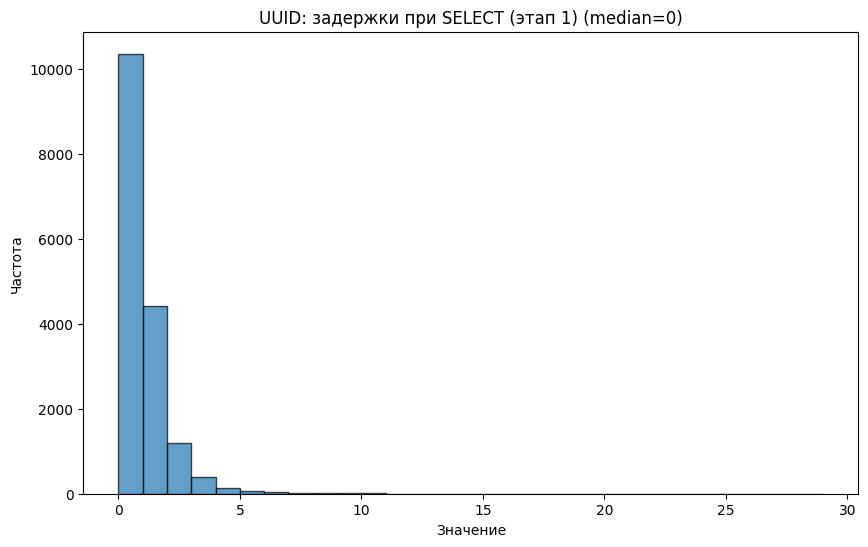

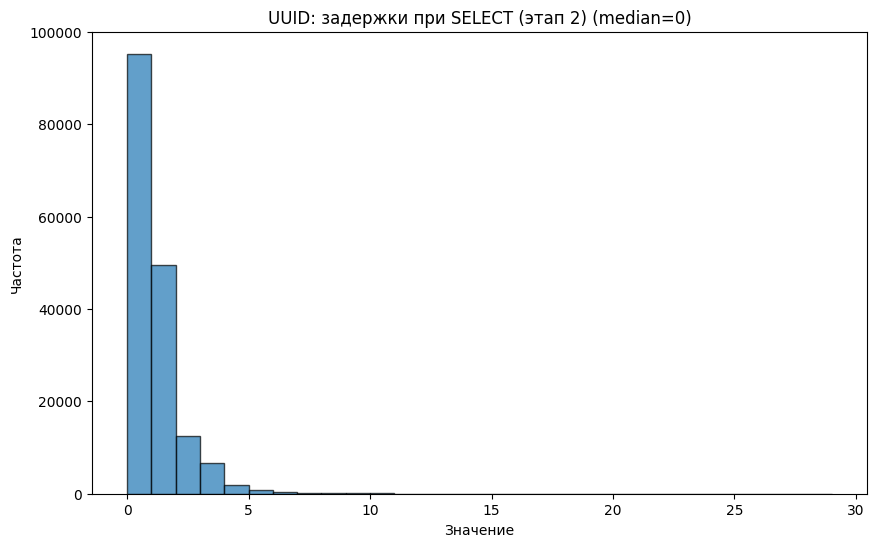

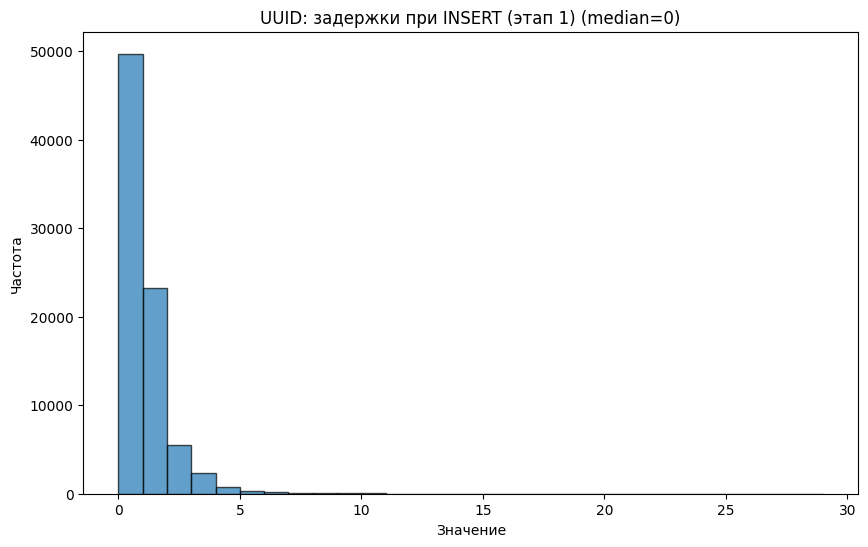

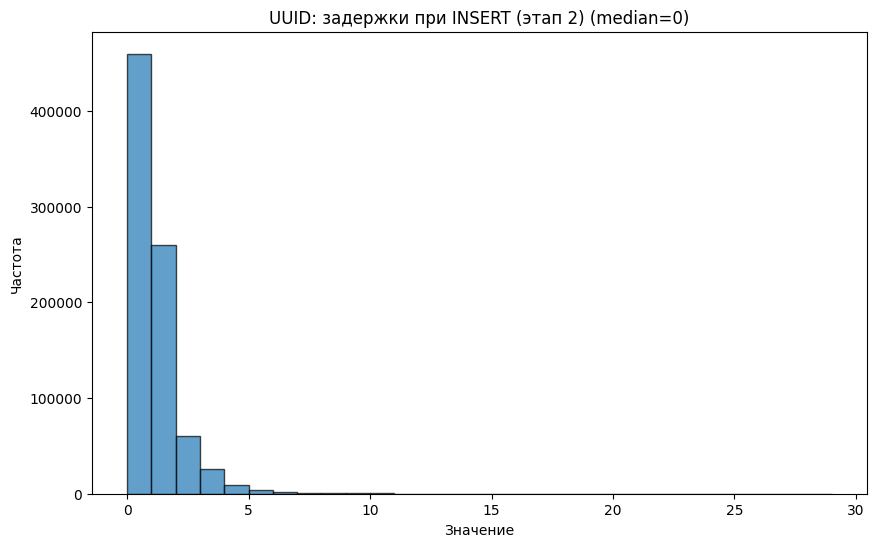

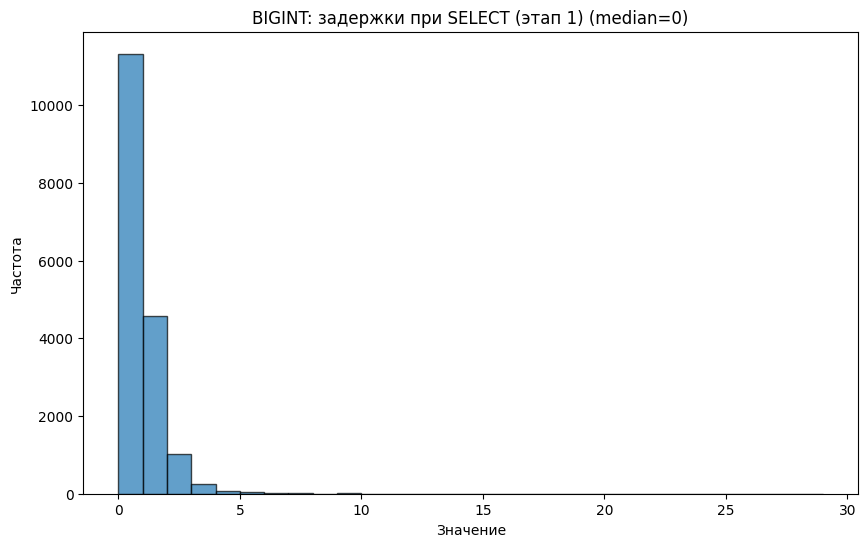

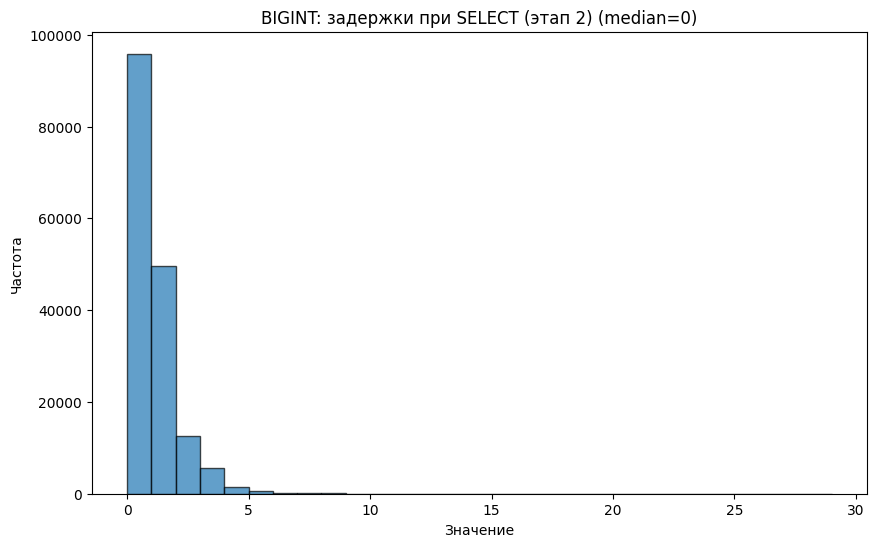

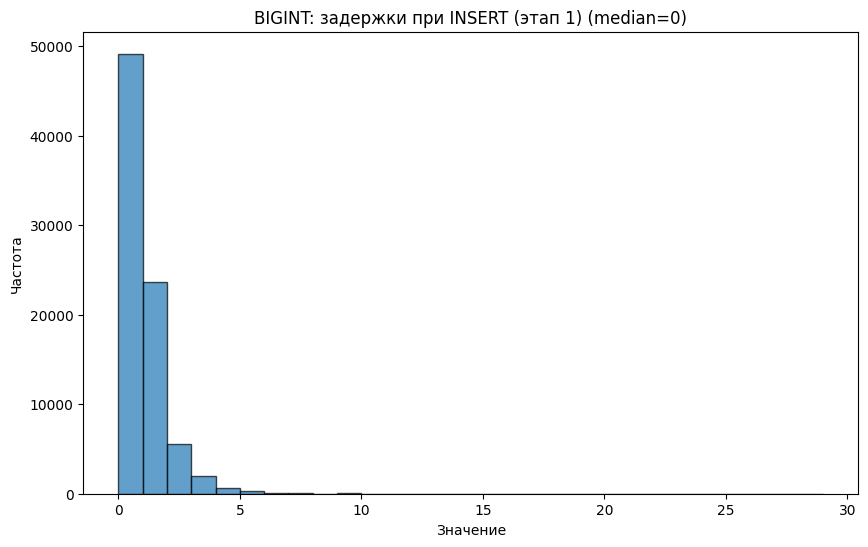

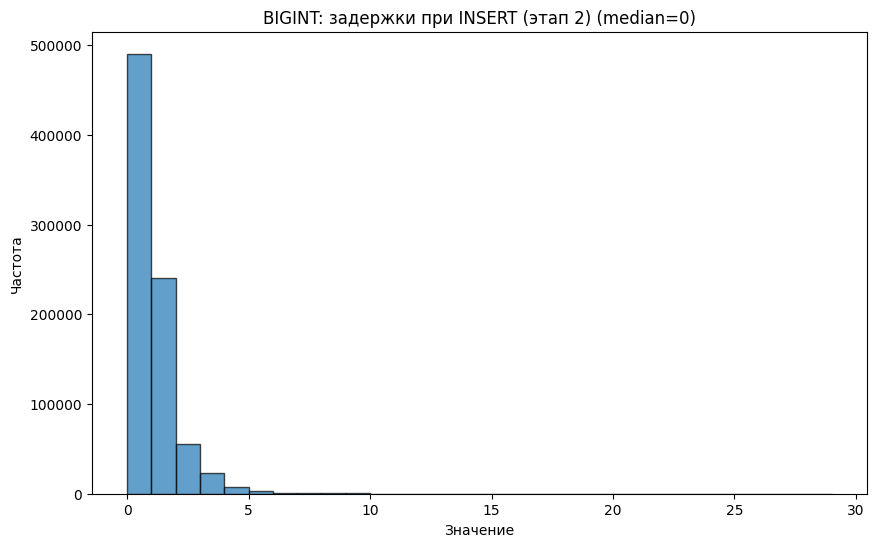

In [ ]:
def plot_histogram(filename, title):
    data = pl.read_csv(
        filename, separator="\n", has_header=False, new_columns=["value"]
    )

    values = np.array(data["value"].to_list())

    plt.figure(figsize=(10, 6))
    plt.hist(values, bins=range(0, 30, 1), edgecolor="black", alpha=0.7)
    plt.title(title + f" (avg={np.average(values)})")
    plt.xlabel("Значение")
    plt.ylabel("Частота")

    plt.show()


for benchmark in ["UUID", "BIGINT"]:
    for method in ["SELECT", "INSERT"]:
        for stage in ["1", "2"]:
            filename = f"{benchmark.lower()}/{method}_{stage}_latency.txt"
            title = f"{benchmark}: задержки при {method} (этап {stage})"
            plot_histogram(filename, title)